In [1]:
import pandas as pd
import numpy as np
import json

# High level data analysis of the jabber chat leaks of the Conti Ransomware group

## 1. Data inspection
Initially, let us look at the contents of the data:

In [2]:
df = pd.read_csv('jabber_chat_2021_2022_translated.csv')
df.head()

,Unnamed: 0,ts,from,to,body,body_en,body_language
0,0,2021-08-23T06:17:46.326321,driver@q3mcco35auwcstmt.onion,hof@q3mcco35auwcstmt.onion,"[Ошибка: сообщение зашифровано, и невозможно е...",[Error: The message is encrypted and cannot be...,NaN
1,1,2021-08-23T06:21:29.401324,driver@q3mcco35auwcstmt.onion,defender@q3mcco35auwcstmt.onion,"[Ошибка: сообщение зашифровано, и невозможно е...",[Error: The message is encrypted and cannot be...,NaN
2,2,2021-08-23T06:43:20.480030,driver@q3mcco35auwcstmt.onion,hof@q3mcco35auwcstmt.onion,"[Ошибка: сообщение зашифровано, и невозможно е...",[Error: The message is encrypted and cannot be...,NaN
3,3,2021-08-23T06:43:46.773096,hof@q3mcco35auwcstmt.onion,driver@q3mcco35auwcstmt.onion,"[Ошибка: сообщение зашифровано, и невозможно е...",[Error: The message is encrypted and cannot be...,NaN
4,4,2021-08-23T06:44:22.941040,driver@q3mcco35auwcstmt.onion,hof@q3mcco35auwcstmt.onion,"[Ошибка: сообщение зашифровано, и невозможно е...",[Error: The message is encrypted and cannot be...,NaN


## 2. Amount
 There are a total number of 60773 messages contained in the csv file:

In [3]:
df.shape

(60773, 7)

## 3. Message frequency
 Let us take a look at the accounts that have sent the most messages in the csv file:

In [24]:
concat = pd.concat([df['from'], df['to']])
count = concat.value_counts()
print(count.head(10))
print(f"in total there are {len(count)} accounts involved in the chat")
count = pd.Series.to_frame(count.head(10)).reset_index()

defender@q3mcco35auwcstmt.onion           17753
stern@q3mcco35auwcstmt.onion               9616
driver@q3mcco35auwcstmt.onion              7761
mango@q3mcco35auwcstmt.onion               5880
veron@q3mcco35auwcstmt.onion               5564
bio@q3mcco35auwcstmt.onion                 5367
hof@q3mcco35auwcstmt.onion                 5225
tramp@q3mcco35auwcstmt.onion               3854
skippy@q3mcco35auwcstmt.onion              3670
ttrr@conference.q3mcco35auwcstmt.onion     3617
dtype: int64
in total there are 345 accounts involved in the chat


## 4. Conversation Frequency
Let us now take a look at frequency of the conversations between accounts:

In [27]:
counts = df[['from','to']].value_counts()
counts.head(10)

from                             to                             
driver@q3mcco35auwcstmt.onion    defender@q3mcco35auwcstmt.onion    2849
defender@q3mcco35auwcstmt.onion  driver@q3mcco35auwcstmt.onion      2298
veron@q3mcco35auwcstmt.onion     defender@q3mcco35auwcstmt.onion    2285
defender@q3mcco35auwcstmt.onion  veron@q3mcco35auwcstmt.onion       2029
hof@q3mcco35auwcstmt.onion       defender@q3mcco35auwcstmt.onion    1570
bio@q3mcco35auwcstmt.onion       skippy@q3mcco35auwcstmt.onion      1476
defender@q3mcco35auwcstmt.onion  hof@q3mcco35auwcstmt.onion         1465
bio@q3mcco35auwcstmt.onion       tramp@q3mcco35auwcstmt.onion       1392
grom@q3mcco35auwcstmt.onion      defender@q3mcco35auwcstmt.onion    1100
skippy@q3mcco35auwcstmt.onion    bio@q3mcco35auwcstmt.onion         1090
dtype: int64

## 5. Bitcoin Addresses
We will try to filter out all the bitcoin addresses that are contained in the messages. We utilize a regular expression that captures alphanumeric strings of length 24 to 35 starting with a 1 or 3 (according to bitcoin address format rules https://www.abra.com/blog/crypto-address-formats/)

In [29]:
btc = df['body_en'].str.findall("(^[13][a-zA-Z0-9]{24,35})")
btc = btc[btc.str.len()>0]
btcdf = pd.Series.to_frame(btc)
btcdf['body_en'].explode().unique()

array(['3ESoHHu87mTrFNSNUaMVEfT3vYwRYGfSHQ',
       '1PemRXvQ5nbDs6q19pCUzfd4kXVGovVoe3',
       '15gjb8F5Zd8XRKBCgVxsr8ZuVzr7yBtnCN',
       '1DSp4woswZECAL9zdmmGeu1s7k1sGExFDh',
       '3PNoZtKdNxnCEzdSQegBMbZiUufrL6RtL1',
       '1AXiwETqqQoA52Jk5CmJkbAPuW8nR7VUYz',
       '1hLvH27BxAPbqx3R2fMCuuMPfS2gGDBJL',
       '3N4oho2uXfkFBfUAPtoPGLUXjHXqXV4vrJ',
       '1347fBtFzZCrPq29yjRpct5f6Kq5uHZHHy',
       '36UqDj8hGfZTVjpURvSnKtpJnJKjhYcvuY',
       '3Cxt179UhfF4xkNQsytDmoJVWEJs1ERbZh',
       '3PsVm4PDNhrhwnVf8rsL72mH1CcyCP3etD',
       '31inPQPChryvSPEnaXrBc6kmYH4NAqYnTR',
       '1DS9DVVD4K86ppQhg8ta9XFVEaaW7NXZfA',
       '1HFqLt3fbuewZe5ncJautgncS6hN1ZzX5r',
       '396PgCGZf7FAK5Sxmxa9NhGRZECddT2mMv',
       '1fb0f130ce271b1f62c07795089cea1e',
       '112qJRWfQCAqKzSk3ZcQnq1A1YwqyfLbgp',
       '1FWWRT88WjYbZp4NoRNEBgTGjRxhi2J9YM',
       '1KMRTrRYZABPnCnpqhzECMhjaF5sKCyeQK',
       '3B7AmkZ8VVhKAAqCp4ZLNVbmGJQoZcaBc9',
       '1G5LWXMN42ueD2eWvm4zMrhXGihghHDgMq',
       '3M9tA

## 6. Email Addresses
We will now try to filter out email addresses in a similar fashion - using a very simple regular expression that looks at alphanumeric characters (including symbols such as '_' and '-' and '.' for the first part) inbetween the '@' sign and the top level domain (TLD)

In [9]:
mail = df['body_en'].str.findall("([a-zA-Z0-9._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)")
mail = mail[mail.str.len()>0]
mail = pd.Series.to_frame(mail)
mail['body_en'].explode().unique()

array(['many@q3mcco35auwcstmt.onion', 'hors@q3mcco35auwcstmt.onion',
       'revers@q3mcco35auwcstmt.onion', 'conti.cont@yandex.ru',
       'snowwinter@exploit.im', 'benalien@xmpp.jp',
       'bentley@q3mcco35auwcstmt.onion', 'mont@q3mcco35auwcstmt.onion',
       '21yelow21@jabb.im', 'akonitborec@thesecure.biz',
       'operathionshieldfr@protonmail.com',
       'netwalker@q3mcco35auwcstmt.onion', 'rand@q3mcco35auwcstmt.onion',
       'DOC_ID@exploit.im', 'al.pro.80@jabb.im',
       'i72jc910jecuwj72771@creep.im', 'emigrant@xmpp.jp',
       'tiffany.huff@levelconsult.us', 'zevs@q3mcco35auwcstmt.onion',
       'dpigeon@exploit.im', 'support@korovka.name', 'support@mpro.la',
       'hash@q3mcco35auwcstmt.onion', 'viper@q3mcco35auwcstmt.onio',
       'grolly26@protonmail.com', 'info@loudounmutual.comWeb',
       'miroslavpopov1980@outlook.com', 'tramp@q3mcco35auwcstmt.onion',
       'fillemand@protonmail.com', 'sticks@q3mcco35auwcstmt.onion',
       'jumbo@q3mcco35auwcstmt.onion', 'answer

## 7. URL Addresses
In this section we will use a regular expression that filters out any URLs that could be contained. This regular expression was found in a comment on stackoverflow (https://stackoverflow.com/questions/3809401/what-is-a-good-regular-expression-to-match-a-url) and suited our needs the most, because it explicitly filters out links containing the protocol suffix (https)

In [10]:
url = df['body_en'].str.findall("(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})")
url = url[url.str.len()>0]
url = pd.Series.to_frame(url)
url['body_en'].explode().unique()

array(['https://1ty.me/fVwTjia',
       'https://dropfiles.me/download/eeb3fc729cb79022/#mZBLTgtVKMw90BQui9F2Tg',
       'https://privnote.com/KSF76hNQ#pQqGCVboU', ...,
       'https://qaz.im/load/Gy53HN/k5r2Nb',
       'https://qaz.im/index.php?a=delete&q=1945296066',
       'https://privnote.com/cGEAmglH#Kvq1moTRK'], dtype=object)

## 8. IP Addresses
Here we try to filter out IP addresses contained in the chat messages utilizing another common regular expression to find IP Addresses as found on https://www.ibm.com/docs/en/dsm?topic=qradar-common-regular-expressions

In [30]:
ip = df['body_en'].str.findall("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}(?:\/\d{2})?")
ip = ip[ip.str.len()>0]
ip = pd.Series.to_frame(ip)
ip['body_en'].explode().unique()

array(['208.110.64.130', '61.177.172.13', '192.187.107.16',
       '91.189.92.20', '91.189.92.38', '91.189.92.39', '91.189.92.19',
       '91.189.92.40', '91.189.92.41', '208.10.64.130', '193.57.40.49',
       '185.191.34.120', '193.27.228.65', '71.168.131.157', '71.6.199.23',
       '161.35.12.145', '46.8.157.223', '217.12.218.109',
       '217.12.203.191', '73.180.36.152', '208.125.46.162',
       '5.181.156.166', '94.140.115.123', '103.124.104.56',
       '194.135.33.150', '5.181.80.121', '185.99.133.115', '89.41.182.52',
       '193.8.172.239', '194.15.113.92', '5.196.197.27', '162.55.32.162',
       '31.13.195.184', '192.168.86.23', '255.255.255.0', '192.168.86.1',
       '185.246.152.121', '128.201.76.252', '75.151.48.49', '24.53.75.60',
       '96.70.44.17', '71.105.126.26', '64.40.247.118', '96.93.217.253',
       '173.163.176.177', '12.191.116.202', '217.12.210.41',
       '195.123.212.17', '103.137.80.22', '103.250.70.198',
       '119.148.101.102', '45.126.75.91', '203.76.14

## 9. Organisational structure
In this section we create a new dataframe containing only the messages from the top 10 most frequent chat accounts as we showed in section 3:

In [14]:
aa = df[(df['from'].isin(count['index'])) & (df['to'].isin(count['index']))]
df3 = aa[['from', 'to']]

                                  from                               to
0        driver@q3mcco35auwcstmt.onion       hof@q3mcco35auwcstmt.onion
1        driver@q3mcco35auwcstmt.onion  defender@q3mcco35auwcstmt.onion
2        driver@q3mcco35auwcstmt.onion       hof@q3mcco35auwcstmt.onion
3           hof@q3mcco35auwcstmt.onion    driver@q3mcco35auwcstmt.onion
4        driver@q3mcco35auwcstmt.onion       hof@q3mcco35auwcstmt.onion
...                                ...                              ...
60736  defender@q3mcco35auwcstmt.onion    driver@q3mcco35auwcstmt.onion
60737    driver@q3mcco35auwcstmt.onion  defender@q3mcco35auwcstmt.onion
60761  defender@q3mcco35auwcstmt.onion     veron@q3mcco35auwcstmt.onion
60762  defender@q3mcco35auwcstmt.onion     veron@q3mcco35auwcstmt.onion
60763  defender@q3mcco35auwcstmt.onion     stern@q3mcco35auwcstmt.onion

[23240 rows x 2 columns]


We can use the dataframe from above to create a graph that shows how the top 10 accounts communicate with each others (in this chat excerpt) to try and discern a structure:

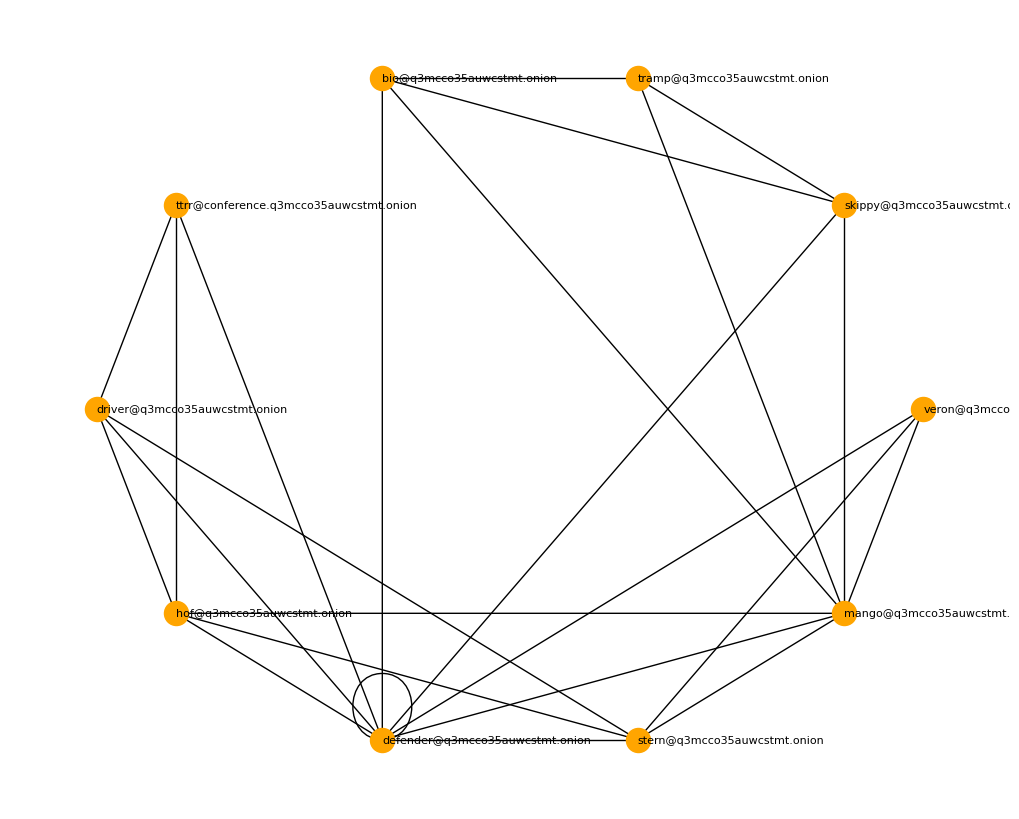

In [22]:
import networkx as nx

G = nx.Graph()
G = nx.from_pandas_edgelist(df3, 'from', 'to')
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
options = {
    'node_color': 'orange',
    'node_size': 300,
    'width': 1,
    'with_labels' : True,
    'font_size' : 8,
    'horizontalalignment' : 'left'
}

nx.draw_shell(G, **options)

As we can see, the user named “Defender” is involved in messaging nearly every other account from the top 10 most frequent messengers. “Stern” is also quite connected, at least to “Mango” and “Hof”, who appear to be the primary contacts of several other contacts. For “Hof” that is predominantly “ttrr” and “Driver”, whereas “Mango” is involved with “Veron”, “Skippy”, “Tramp” and “Bio”. The two teams from “Hof” and “Mango” don’t appear to communicate with each other at all, indicating that either “Hof” and “Mango” could be responsible for communication as part of a managerial esque role. “Defender” appears to be connected to every other contact except user “Tramp”.